In [ ]:
# Importing necessary libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
## If nltk is not present then run this command - pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation


# Importing libraries necessary for Model Building and Training.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

### Visualize data.

In [ ]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Tạo cột Group dựa trên cột Category.
data['Group'] = data['Category']
data['Group']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Group, Length: 5572, dtype: object

In [ ]:
data

,Category,Message,Group
0,ham,"Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,spam
5568,ham,Will ü b going to esplanade fr home?,ham
5569,ham,"Pity, * was in mood for that. So...any other s...",ham
5570,ham,The guy did some bitching but I acted like i'd...,ham


In [ ]:
for i in range(len(data)):
    if data['Group'].iloc[i] == 'spam':
        data['Group'].iloc[i] = 1
    else:
        data['Group'].iloc[i] = 0

In [ ]:
# Đếm tần suất.
freq = data.groupby(['Category'])['Category'].count()
freq

Category
ham     4825
spam     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

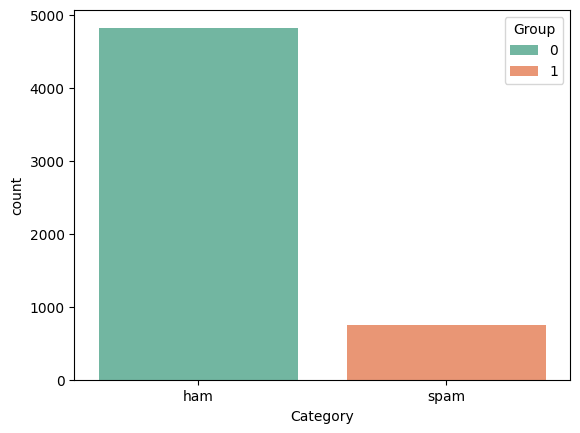

In [ ]:
# Use a different colour palette in count plot
sns.countplot(data = data, x ='Category', hue="Group", stat="count", palette = "Set2")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_countplot(data, x, hue):
    """
    Vẽ biểu đồ countplot của tỉ lệ phần trăm của hai nhóm dựa trên dữ liệu.

    Tham số:
    - data: DataFrame, dữ liệu cần vẽ.
    - x: str, tên của cột dữ liệu trên trục x.
    - hue: str, tên của cột dữ liệu được phân loại (nhóm).

    Trả về:
    None (hiển thị biểu đồ).
    """
    total = float(len(data))  # Tổng số quan sát trong dữ liệu

    # Vẽ countplot
    ax = sns.countplot(x=x, hue=hue, data=data, palette = "Set2", stat="count")

    # Tính tỉ lệ phần trăm và thêm chú thích
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # chỉ hiển thị nếu tỉ lệ khác 0%
          ax.text(p.get_x() + p.get_width() / 2.,
                    height / 2 + p.get_y(),
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center",
                    color="white")

    # Hiển thị biểu đồ
    plt.show()

# Sử dụng hàm
# data: DataFrame chứa dữ liệu
# x: Tên cột dữ liệu trên trục x
# hue: Tên cột dữ liệu được phân loại (nhóm)
# get_x(): Phương thức này trả về vị trí của patch (hình chữ nhật) trên trục x.
# get_height(): Phương thức này trả về chiều cao của patch.
# Ví dụ:
# plot_percentage_countplot(data=df, x='email_type', hue='label')

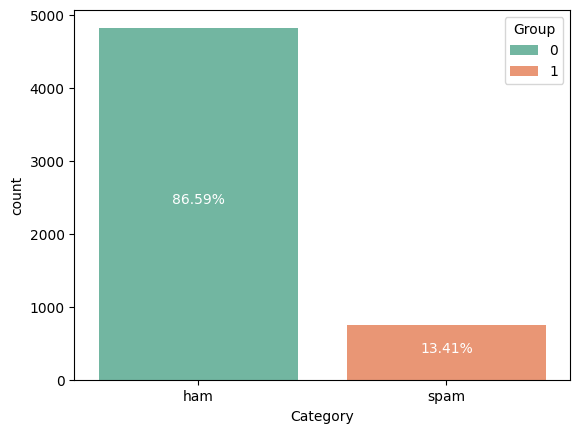

In [ ]:
plot_percentage_countplot(data=data, x='Category', hue='Group')

## Imbalanced Data.

- Chúng ta có thể thấy rõ số lượng mẫu của Ham nhiều hơn số lượng mẫu của Spam điều đó hàm ý rằng tập dữ liệu chúng ta đang sử dụng bị mất cân bằng.

In [ ]:
for i in range(len(data)):
    if data['Category'].iloc[i] == 'spam':
        data['Category'].iloc[i] = 1
    else:
        data['Category'].iloc[i] = 0

In [ ]:
data

,Category,Message,Group
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,1
5568,0,Will ü b going to esplanade fr home?,0
5569,0,"Pity, * was in mood for that. So...any other s...",0
5570,0,The guy did some bitching but I acted like i'd...,0


### Sử dụng phương pháp Downsampling.

In [ ]:
freq = data.groupby(['Category'])['Category'].count()
freq

Category
0    4825
1     747
Name: Category, dtype: int64

In [ ]:
spam_msg = data[data.Category == 1]
len(spam_msg)

747

Text(0.5, 0, 'Message types')

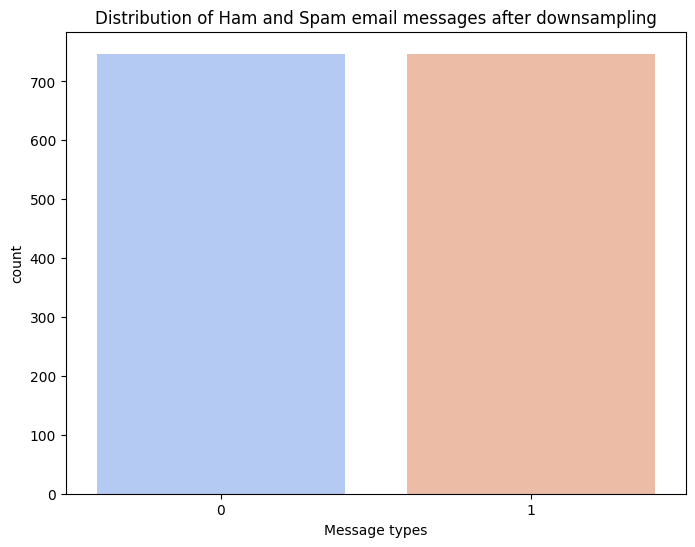

In [ ]:
# Downsampling to balance the dataset
# Downsampling là giảm bớt dữ liệu quan sát.
ham_msg = data[data.Category == 0]
spam_msg = data[data.Category == 1]
# Lấy ham_msg bằng với số dữ liệu của spam_msg.
ham_msg = ham_msg.sample(n=len(spam_msg),random_state=42)

# Concatenating the downsampled DataFrames: tạo 1 bảng dataframe mới bằng cách nối bảng theo chiều dọc.
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting the counts of down sampled dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='Category', palette = "coolwarm")
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [ ]:
ham_msg
# Có 747 thư bình thường.

,Category,Message
3714,0,If i not meeting ü all rite then i'll go home ...
1311,0,"I.ll always be there, even if its just in spir..."
548,0,"Sorry that took so long, omw now"
1324,0,I thk 50 shd be ok he said plus minus 10.. Did...
3184,0,Dunno i juz askin cos i got a card got 20% off...
...,...,...
4992,0,We made it! Eta at taunton is 12:30 as planned...
3117,0,Uncle Abbey! Happy New Year. Abiola
4975,0,Aiyo u so poor thing... Then u dun wan 2 eat? ...
3505,0,Will you be here for food


In [ ]:
spam_msg
# Và 747 thư spam.

,Category,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
balanced_data['Message'] = balanced_data['Message'].str.replace('Subject', '')
balanced_data.info()
# Tổng cộng có 1494 thư.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1494 non-null   object
 1   Message   1494 non-null   object
 2   Group     1494 non-null   object
dtypes: object(3)
memory usage: 35.1+ KB


In [ ]:
# Loại bỏ dấu câu.
# Hàm maketrans để chuyển đổi.
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['Message']= balanced_data['Message'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Category,Message,Group
0,0,meeting ü rite ill go home lor ü dun feel like...,0
1,0,ill always there even spirit ill get bb soon t...,0
2,0,sorry took long omw,0
3,0,thk 50 shd ok said plus minus 10 ü leave line ...,0
4,0,dunno juz askin cos got card got 20 4 salon ca...,0


- Stopword là các từ không đóng góp vào làm rõ nghĩa hơn.

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['Message'] = balanced_data['Message'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Category,Message,Group
0,0,meeting ü rite i'll go home lor. ü dun feel li...,0
1,0,"i.ll always there, even spirit. i.ll get bb so...",0
2,0,"sorry took long, omw",0
3,0,thk 50 shd ok said plus minus 10.. ü leave lin...,0
4,0,dunno juz askin cos got card got 20% 4 salon c...,0


In [ ]:
len(balanced_data['Message'])

1494

In [ ]:
len(balanced_data['Category'])

1494

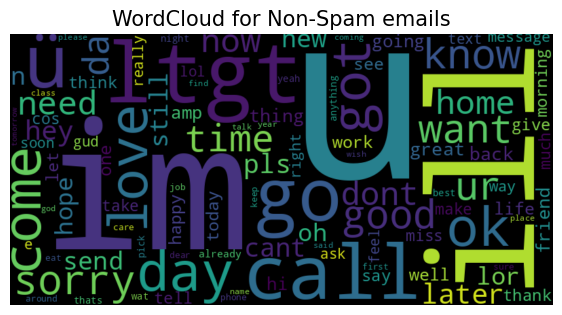

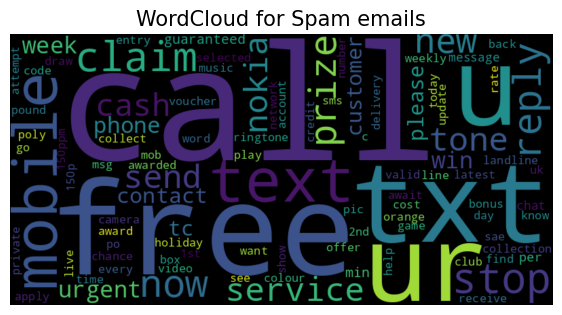

In [ ]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['Message'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100, # Giới hạn từ tối đa trong biểu diễn WordCloud là 100 từ.
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus) # Không hiển thị các từ ghép cặp với nhau.

    plt.imshow(wc, interpolation='bilinear') # Dùng nội suy tuyến tính để hiển thị.
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['Category'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['Category'] == 1], typ='Spam')

## Chuyển đổi Word2Vec.

- Vì mô hình học máy chỉ hiểu số, không hiểu text nên ta cần bước chuyển đổi này.

In [ ]:
balanced_data['Message']

0       meeting ü rite ill go home lor ü dun feel like...
1       ill always there even spirit ill get bb soon t...
2                                     sorry took long omw
3       thk 50 shd ok said plus minus 10 ü leave line ...
4       dunno juz askin cos got card got 20 4 salon ca...
                              ...                        
1489    want explicit sex 30 secs ring 02073162414 now...
1490    asked 3mobile 0870 chatlines inclu free mins i...
1491    contract mobile 11 mnths latest motorola nokia...
1492    reminder o2 get 250 pounds free call credit de...
1493    2nd time tried 2 contact u u £750 pound prize ...
Name: Message, Length: 1494, dtype: object

## Train test split.

In [ ]:
# Đầu vào là dữ liệu text mail.
# Đầu ra là 0 và 1 để xem spam hay normal.
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['Message'],
                                                    balanced_data['Category'],
                                                    test_size = 0.2,
                                                    random_state = 42)

- Chúng tôi đã trang bị mã thông báo trên dữ liệu đào tạo của mình, chúng tôi sẽ sử dụng nó để chuyển đổi cả dữ liệu đào tạo và xác thực thành vectơ.

### Padding là gì?
- Pad sequences là việc thêm bộ đệm cho ma trận vào.
- Nó thêm các phần tử vào ma trận đầu vào trước khi áp dụng bất kỳ bộ lọc tích chập nào và do đó, nó hỗ trợ ngăn ngừa mọi mất mát thông tin, đặc biệt là từ các cạnh của hình ảnh.

In [ ]:
# Tokenize the text data, split câu ra thành các từ nhỏ.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Sau khi tokenizer thì ta chuyển text sang số.
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

In [ ]:
print(train_sequences)

[[ 461  203   47 ...    0    0    0]
 [  90   37    1 ...    0    0    0]
 [ 341 1086   85 ...    0    0    0]
 ...
 [ 238   32   30 ...    0    0    0]
 [  24   10   53 ...    0    0    0]
 [  65  471  792 ...    0    0    0]]


### Phát triển và đánh giá mô hình.

- Chúng tôi sẽ triển khai mô hình Tuần tự bao gồm các phần sau:

  - Ba lớp nhúng để tìm hiểu các biểu diễn vectơ đặc trưng của vectơ đầu vào.
  - Lớp LSTM để xác định các mẫu hữu ích trong chuỗi.
  - Sau đó chúng ta sẽ có một lớp được kết nối đầy đủ.
  - Lớp cuối cùng là lớp đầu ra đưa ra xác suất cho hai lớp.

### Vanishing Gradient là gì?
- Là vấn đề xảy ra khi huấn luyện các mạng nơ ron nhiều lớp. Khi huấn luyện, giá trị đạo hàm là thông tin phản hồi của quá trình lan truyền ngược. Giá trị này trở nên vô cùng nhỏ tại các lớp nơ ron đầu tiên khiến cho việc cập nhật trọng số mạng không thể xảy ra.

In [ ]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           132224    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 135937 (531.00 KB)
Trainable params: 135937 (531.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

- Lệnh gọi lại được sử dụng để kiểm tra xem mô hình có được cải thiện theo từng kỷ nguyên hay không. Nếu không thì các bước cần thiết cần thực hiện là gì để GiảmLROnPlateau làm giảm tỷ lệ học tập hơn nữa? Ngay cả khi hiệu suất của mô hình không được cải thiện thì việc đào tạo sẽ bị EarlyStopping dừng lại . Chúng tôi cũng có thể xác định một số lệnh gọi lại tùy chỉnh để dừng đào tạo giữa chừng nếu đạt được kết quả mong muốn sớm.

In [ ]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [ ]:
train_sequences

array([[4.490e+02, 1.980e+02, 4.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.700e+01, 3.600e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.320e+02, 1.055e+03, 8.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.320e+02, 3.100e+01, 2.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.400e+01, 1.000e+01, 5.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.300e+01, 4.590e+02, 7.650e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

In [ ]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences)

In [ ]:
print(type(train_sequences[0]))

<class 'numpy.ndarray'>


In [ ]:
train_sequences = np.array(train_sequences, dtype=np.float32)

In [ ]:
print(train_sequences_tensor.shape)

(1195, 100)


In [ ]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences.tolist())

In [ ]:
# Train the model
history = model.fit(train_sequences_tensor, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                   )

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
data['Message'].apply(lambda x:nltk.word_tokenize(x))
# Breaking sentence into number of words.
# Đếm cả dấu câu.

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

In [ ]:
data['Message'].apply(lambda x:len(nltk.word_tokenize(x))) ## Counting number.

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message, Length: 5572, dtype: int64

In [ ]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
data['Word Count'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data['Sentence Count']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data['num_characters']=data['Message'].apply(len) # Number of characters in a mail.

<Axes: xlabel='Word Count', ylabel='Count'>

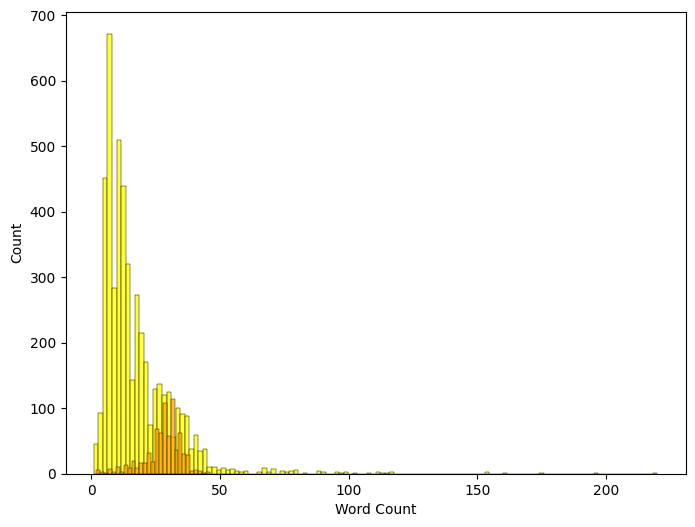

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Category']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['Category']==1]['Word Count'],color = 'orange')

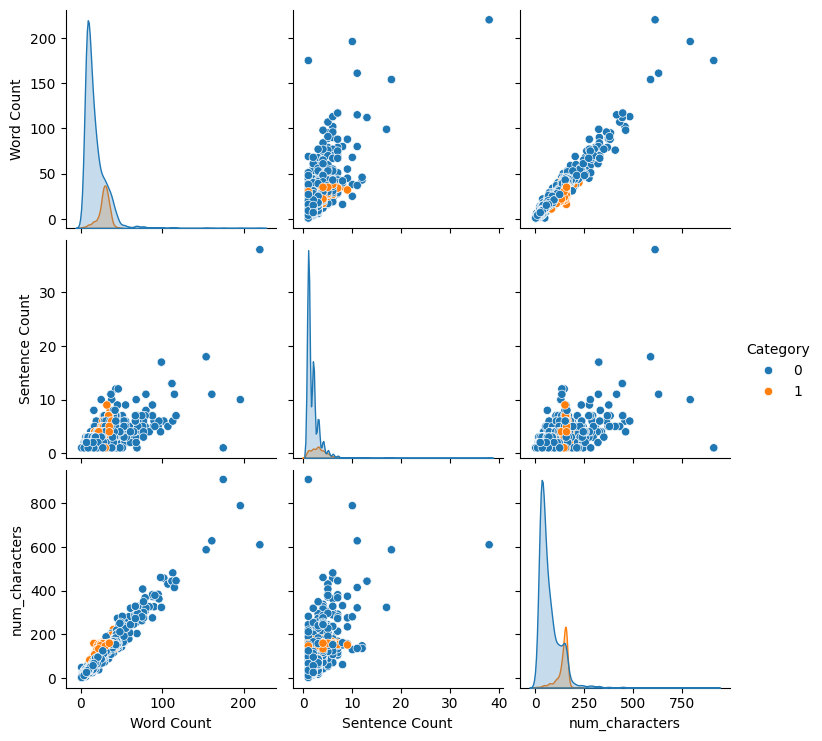

In [ ]:
sns.pairplot(data,hue='Category')

### Chuẩn hóa dữ liệu.

In [ ]:
# Theo kiểu list comprehension.
output = [data['Message'][i] for i in range(len(data['Message']))]
print(output)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [ ]:
len(data['Message'])

5572

In [ ]:
output = []
for i in range(len(data['Message'])):
    text = data['Message'][i].lower().split(' ')
    output.append(text)
print(output)

[['go', 'until', 'jurong', 'point,', 'crazy..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'cine', 'there', 'got', 'amore', 'wat...'], ['ok', 'lar...', 'joking', 'wif', 'u', 'oni...'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question(std', 'txt', "rate)t&c's", 'apply', "08452810075over18's"], ['u', 'dun', 'say', 'so', 'early', 'hor...', 'u', 'c', 'already', 'then', 'say...'], ['nah', 'i', "don't", 'think', 'he', 'goes', 'to', 'usf,', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', "it's", 'been', '3', "week's", 'now', 'and', 'no', 'word', 'back!', "i'd", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still?', 'tb', 'ok!', 'xxx', 'std', 'chgs', 'to', 'send,', '£1.50', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me.', 'they', 'treat', 'me',

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Roaming')
def transform_text():
  output = []
  for i in range(len(data['Message'])):
    text = data['Message'][i].lower().split(' ') # Lower and Tokenize.
    for j in text: # Removing stop words and punctuation.
        if j not in stopwords.words('english') and j not in string.punctuation:
            output.append(j)
    for k in text:  # Stemmimg đưa về từ nguyên mẫu.
        output.append(ps.stem(k))
  return output

In [ ]:
transform_text()

['go',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'got',
 'amore',
 'wat...',
 'go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'avail',
 'onli',
 'in',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amor',
 'wat...',
 'ok',
 'lar...',
 'joking',
 'wif',
 'u',
 'oni...',
 'ok',
 'lar...',
 'joke',
 'wif',
 'u',
 'oni...',
 'free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)t&c's",
 'apply',
 "08452810075over18's",
 'free',
 'entri',
 'in',
 '2',
 'a',
 'wkli',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receiv',
 'entri',
 'question(std',
 'txt',
 "rate)t&c'",
 'appli',
 "08452810075over18'",
 'u',
 'dun',
 'say',
 'early',
 'hor...',
 'u',
 'c',

In [ ]:
import re
def transform_text(text):
    for i in range(len(data['Message'])):
      text = data['Message'][i].lower() # 1. Lower Case Convertion
      text = text.split(' ') # 2. Tokenization

    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # 3. Remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in text]

    return stripped

In [ ]:
transform_text(text)

['rofl', 'its', 'true', 'to', 'its', 'name']

In [ ]:
text = ['fishing','Loved']
output = []
for k in text:  # Stemmimg đưa về từ nguyên mẫu.
    output.append(ps.stem(k))
print(output)

['fish', 'love']


In [ ]:
def transform_text(text):
    text = []
    for i in range(len(data['Message'])):
      text = data['Message'][i].lower() # 1. Lower Case Convertion
      text = text.split(' ') # 2. Tokenization
      text.append(text)
    return text

In [ ]:
transform_text(text)

['rofl.', 'its', 'true', 'to', 'its', 'name', [...]]

In [ ]:
text = []
for i in range(len(data['Message'])):
  text = data['Message'][i].lower() # 1. Lower Case Convertion
  text = text.split(' ') # 2. Tokenization
  text.append(text)

y = [] # 3. Removing special Characters
for i in str(text):
    if i.isalnum():
        y.append(i)
print(y)

text = y[:]
y.clear()

for i in text: # 4. Removing stop words and punctuation
    if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

text = y[:]
y.clear()

for i in text:  # 5. Stemmimg
    y.append(ps.stem(i))


['r', 'o', 'f', 'l', 'i', 't', 's', 't', 'r', 'u', 'e', 't', 'o', 'i', 't', 's', 'n', 'a', 'm', 'e']
